# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = pd.read_csv('train_hw2_mo.csv')
train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.drop('dropoff_datetime', axis = 1, inplace = True)

In [6]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [7]:
#создадим колонку, где оставим только даты
train['pickup_date'] = train['pickup_datetime'].dt.date

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

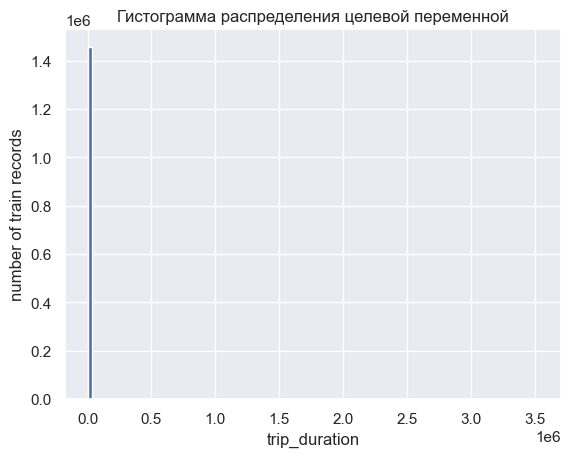

In [8]:
# #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.title('Гистограмма распределения целевой переменной')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Вероятно, в каком-то столбце есть выбросы или распределение имеет тяжелын хвосты, поэтому график не очень информативен.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Возможно, была выбрана RMSLE, так как она менее чувствительна к выбросам в отличие от RMSE, которая при наличии выбросов очень сильно растет. Также RMSLE несет больший штраф за недооценку фактического значения. Вероятно, в нашем случае недопустима недооценка, но допустимо завышение.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заменим в формуле RMSLE $\log{(y_i + 1)}$ на $\hat{y}_i$, $\log{(a(x_i) + 1)}$ на $\hat{a}(x_i)$. Получим формулу RMSE для модели $\hat{a}(x_i)$.

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i))\big)^2}$$

Мы можем возвести RMSE в квадрат и получим MSE, минимум при этом не изменится.

$$\text{RMSLE}^2(X, y, a) = {\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i))\big)^2} = \text{MSE}(X, \hat{y}, \hat{a})$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_trip_duration'] = np.log1p(train['trip_duration'])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

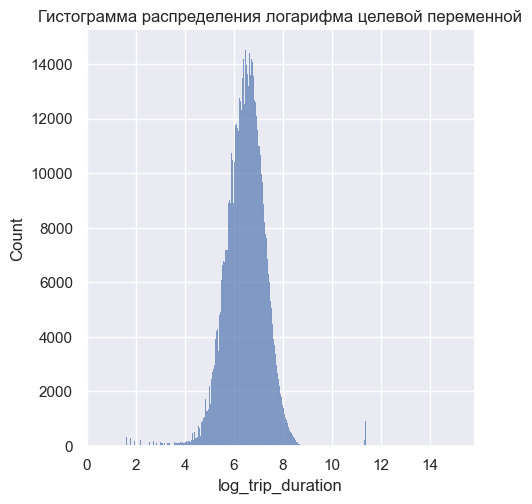

In [10]:
plt.figure(figsize = (12,8))
sns.displot(data=train, x='log_trip_duration')
plt.title('Гистограмма распределения логарифма целевой переменной')
plt.show

Логарифмированная величина имеет уже более адекватное распределение. Достаточно симметричное, островершинное.

In [11]:
train.drop('trip_duration', axis = 1, inplace = True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
from sklearn.metrics import mean_squared_error
def rmsle(log1p_y_true, log1p_y_pred): 
    #╰( ͡° ͜ʖ ͡° )つ──☆*:
    return mean_squared_error(log1p_y_true, log1p_y_pred, squared=False)
    raise NotImplementedError

rmsle_best_const = rmsle(train['log_trip_duration'], np.zeros(len(train)) + np.mean(train['log_trip_duration'].mean()))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411504


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

<function matplotlib.pyplot.show(close=None, block=None)>

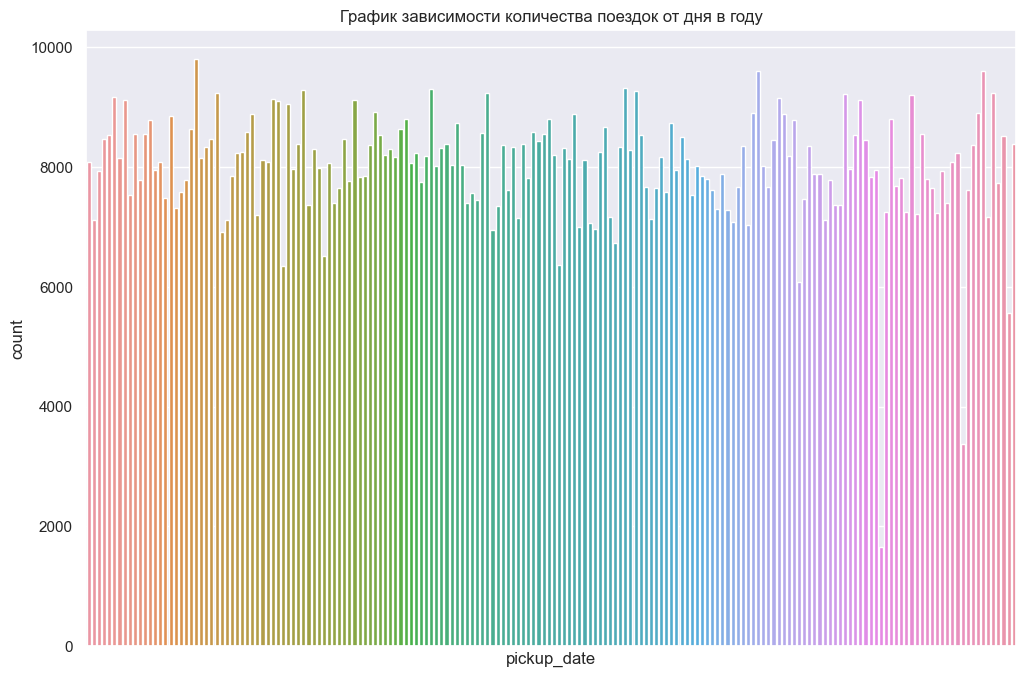

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['pickup_date'] = pd.to_datetime(train['pickup_date'])
plt.figure(figsize = (12,8))
sns.countplot(x = 'pickup_date', data = train)
plt.title('График зависимости количества поездок от дня в году')
plt.tick_params (
 labelleft= True ,
 labelbottom= False )
plt.show

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [14]:
train['pickup_date'].value_counts().sort_values()

2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
              ... 
2016-02-13    9309
2016-04-02    9325
2016-03-05    9597
2016-04-16    9602
2016-04-09    9796
Name: pickup_date, Length: 182, dtype: int64

Самое маленькое количество поездок было 23.01.2016 и 24.01.2016. В эти дни в США была сильная снежная буря, поэтому в Нью-Йорке было запрещено автомобильное движение.

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#train['pickup_date'] = pd.to_datetime(train['pickup_date'])
train['weekday'] = train['pickup_date'].dt.weekday
train['hour'] = train['pickup_datetime'].dt.time
train['hour'] = train['pickup_datetime'].dt.hour

In [16]:
days = pd.DataFrame(train['weekday'].value_counts())
hours = pd.DataFrame(train['hour'].value_counts())
days.reset_index(inplace= True )
hours.reset_index(inplace= True )
# train.loc[train['weekday'] == 0, 'weekday'] = 'Monday'
# train.loc[train['weekday'] == 1, 'weekday'] = 'Tuesday'
# train.loc[train['weekday'] == 2, 'weekday'] = 'Wednesday'
# train.loc[train['weekday'] == 3, 'weekday'] = 'Thursday'
# train.loc[train['weekday'] == 4, 'weekday'] = 'Friday'
# train.loc[train['weekday'] == 5, 'weekday'] = 'Saturday'
# train.loc[train['weekday'] == 6, 'weekday'] = 'Sunday'

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

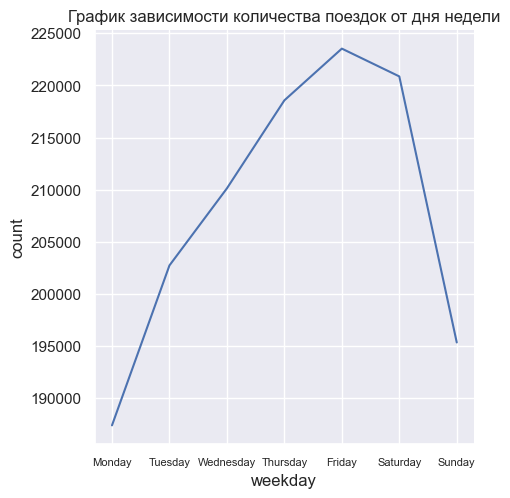

In [17]:
plt.figure(figsize = (12,8))
x_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(
    data= days, kind = 'line',
    x='index', y = 'weekday', row_order = x_order)
plt.title('График зависимости количества поездок от дня недели')
plt.xlabel("weekday")
plt.ylabel("count")
plt.xticks(days['index'].sort_values(), x_order, fontsize = 8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

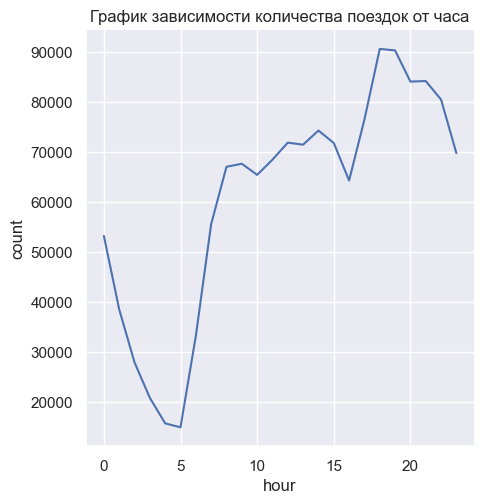

In [18]:
plt.figure(figsize = (12,8))
sns.relplot(
    data= hours, kind = 'line',
    x='index', y = 'hour', )
plt.title('График зависимости количества поездок от часа')
plt.xlabel("hour")
plt.ylabel("count")
plt.show

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

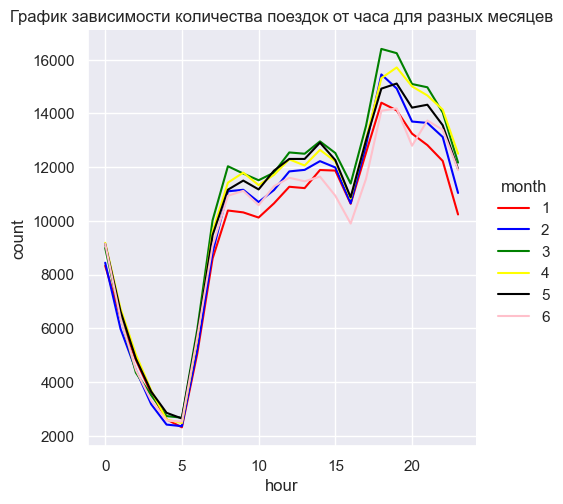

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Colors = ['red', 'blue', 'green', 'yellow', 'black', 'pink']
train['month'] = train['pickup_date'].dt.month
D = pd.DataFrame(train.groupby(['hour', 'month']).agg({'pickup_date': ['count']}))
D.reset_index(inplace= True)
D.columns = ['hour', 'month', 'count']
plt.figure(figsize = (12,8))
sns.relplot(
    data=D, kind = 'line',
    x='hour', y = 'count', hue = 'month', palette = Colors)
plt.title('График зависимости количества поездок от часа для разных месяцев')
plt.xlabel("hour")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

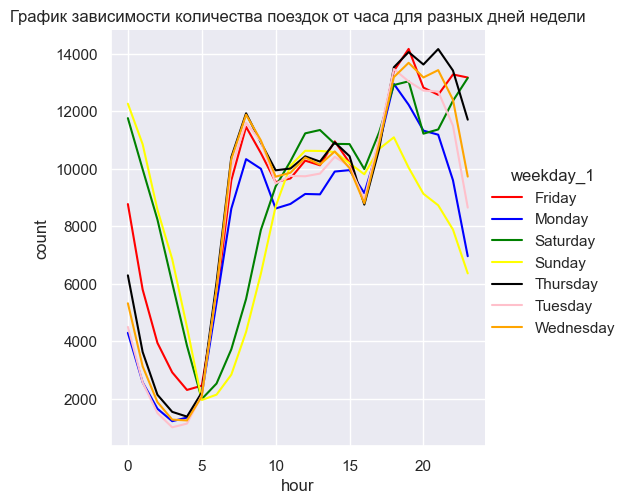

In [20]:
Colors = ['red', 'blue', 'green', 'yellow', 'black', 'pink', 'orange']
train['weekday_1'] = train['pickup_date'].dt.day_name()
D = pd.DataFrame(train.groupby(['hour', 'weekday_1']).agg({'pickup_date': ['count']}))
D.reset_index(inplace= True)
D.columns = ['hour', 'weekday_1', 'count']
plt.figure(figsize = (12,8))
sns.relplot(
    data=D, kind = 'line',
    x='hour', y = 'count', hue = 'weekday_1', palette = Colors)
plt.title('График зависимости количества поездок от часа для разных дней недели')
plt.xlabel("hour")
plt.ylabel("count")

plt.show

Самое большое количество поездок осуществляется в пятницу. Наиболее популярное время поездок период с 16 до 20. Если смотреть на зависимость количества поездок от часа по месяцам, то можно выделить март, для которого с 16 до 20 характерно самое большое количество. На последнем графике мы отчетлив видим, что в воскресенье и субботу достаточно велико количество ночных поездок в интервал с 0 до 5 утра, в отличие от других дней недели. Также можно заметить, что в рабочие дни много поездок совершается утром с 8 до 10.

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
np.random.seed(1)
data = train.copy()
train, test = train_test_split(train, test_size = 0.3)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x1000 with 0 Axes>

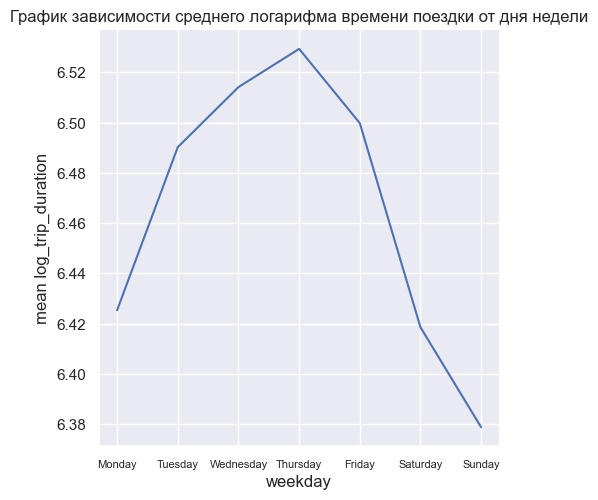

In [22]:
plt.figure(figsize = (12,10))
sns.relplot(
    data= pd.DataFrame(train.groupby('weekday')['log_trip_duration'].mean()), kind = 'line',
    x='weekday', y = 'log_trip_duration')
plt.title('График зависимости среднего логарифма времени поездки от дня недели')
plt.xlabel("weekday")
plt.ylabel("mean log_trip_duration")
plt.xticks(days['index'].sort_values(), x_order, fontsize = 8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x1000 with 0 Axes>

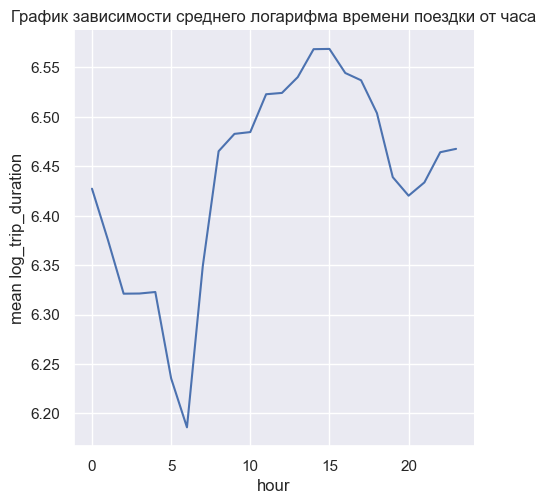

In [23]:
plt.figure(figsize = (12,10))
sns.relplot(
    data= pd.DataFrame(train.groupby('hour')['log_trip_duration'].mean()), kind = 'line',
    x= 'hour', y = 'log_trip_duration')
plt.title('График зависимости среднего логарифма времени поездки от часа')
plt.xlabel("hour")
plt.ylabel("mean log_trip_duration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

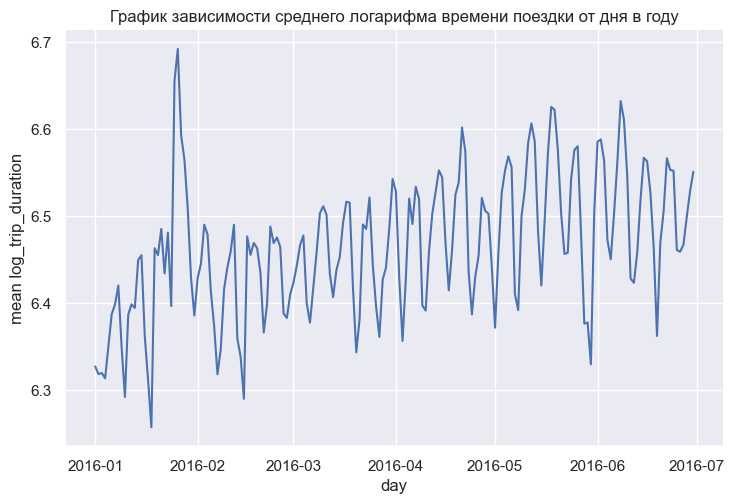

In [24]:
sns.relplot(
    data= pd.DataFrame(train.groupby('pickup_date')['log_trip_duration'].mean()), kind = 'line',
    x= 'pickup_date', y = 'log_trip_duration', height = 5, aspect = 1.5)
plt.title('График зависимости среднего логарифма времени поездки от дня в году')
plt.xlabel("day")
plt.ylabel("mean log_trip_duration")
plt.show

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Да, графики зависимости таргета от дня недели и от часа в сутках похожи на аналогичные графики для количества поездок, так как, вероятно, чем больше совершается поездок в день, тем больше загруженность на дорогах, и время в пути увеличивается. Средний таргет 23 и 24 января снижается, так как очень мало поездок совершалось в те дни, а следовательно и время в поездке было меньше. Мы можем наблюдать, что, как правило, четыре раза в месяц средний логарифм времени в поездке уменьшается. Это обычно происходит примерно в одни и те же даты.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#ранее уже были добавлены признаки день недели (weekday_1), месяц (month), час (hour). Добавим оставшиеся два.
train.drop('weekday', axis = 1, inplace = True)
train['day_of_year'] = train['pickup_date'].dt.dayofyear 
train['abnormal_1'] = np.where(train['pickup_date'] == '2016-01-23', 1, 0)
train['abnormal_2'] = np.where(train['pickup_date'] == '2016-01-24', 1, 0)
train.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,log_trip_duration,hour,month,weekday_1,day_of_year,abnormal_1,abnormal_2
941504,id0260330,1,2016-02-27 00:00:28,1,-74.005402,40.738270,-73.964195,40.684612,N,2016-02-27,7.417580,0,2,Saturday,58,0,0
1026826,id3250315,2,2016-01-24 18:49:08,1,-73.988663,40.722675,-73.981293,40.747349,N,2016-01-24,6.591674,18,1,Sunday,24,0,1


In [26]:
test.drop('weekday', axis = 1, inplace = True)
test['day_of_year'] = test['pickup_date'].dt.dayofyear 
test['abnormal_1'] = np.where(test['pickup_date'] == '2016-01-23', 1, 0)
test['abnormal_2'] = np.where(test['pickup_date'] == '2016-01-24', 1, 0)
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,log_trip_duration,hour,month,weekday_1,day_of_year,abnormal_1,abnormal_2
1457636,id0880738,2,2016-02-27 20:13:05,1,-73.981728,40.749500,-73.945915,40.792061,N,2016-02-27,6.541030,20,2,Saturday,58,0,0
615369,id2002545,2,2016-06-04 09:54:05,1,-73.979088,40.771606,-73.946518,40.822655,N,2016-06-04,6.898715,9,6,Saturday,156,0,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

id - категориальный (не можем сравнивать, проводить арифметические операции)
vendor_id - категориальный (аналогично)
passenger_count - численный (можем сравнить количество пассажиров, сложить его)
pickup_longitude - численный
pickup_latitude - численный
dropoff_longitude - численный
dropoff_latitude - численный
store_and_fwd_flag - категориальный
pickup_datetime - лучше разбить на несколько, что мы и сделали
hour - численный
month - категориальный
weekday_1 - категориальный
day_of_year - категориальный
abnormal_1,	abnormal_2 - категориальные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_1 = train.iloc[ :, 10:18]
test_1 = test.iloc[ :, 10:18]

In [28]:
train_numeric = pd.DataFrame(train_1.iloc[:, 1])
train_cat_ohe = train_1.iloc[:, 2:5]
train_cat = train_1.iloc[:, -2:]
test_numeric = pd.DataFrame(test_1.iloc[:, 1])
test_cat_ohe = test_1.iloc[:, 2:5]
test_cat = test_1.iloc[:, -2:]

In [29]:
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()
normalizer.fit(train_numeric)
X_train_norm = normalizer.transform(train_numeric)
X_test_norm = normalizer.transform(test_numeric)
X_train = pd.DataFrame(data=X_train_norm, columns = train_numeric.columns)
X_test=pd.DataFrame(data=X_test_norm, columns = test_numeric.columns)

In [30]:
# train_cat_ohe['month'] = train_cat_ohe['month'].astype(str)
# train_cat_ohe['day_of_year'] = train_cat_ohe['day_of_year'].astype(str)
# train_cat_ohe_new = pd.get_dummies(train_cat_ohe, drop_first=True)
# test_cat_ohe['month'] = test_cat_ohe['month'].astype(str)
# test_cat_ohe['day_of_year'] = test_cat_ohe['day_of_year'].astype(str)
# test_cat_ohe_new = pd.get_dummies(test_cat_ohe, drop_first=True)

In [31]:
import category_encoders as ce
train_cat_ohe['month'] = train_cat_ohe['month'].astype(str)
train_cat_ohe['day_of_year'] = train_cat_ohe['day_of_year'].astype(str)
test_cat_ohe['month'] = test_cat_ohe['month'].astype(str)
test_cat_ohe['day_of_year'] = test_cat_ohe['day_of_year'].astype(str)
ohe_encoder = ce.OneHotEncoder(return_df=True, use_cat_names=True)
ohe_encoder.fit(train_cat_ohe)
train_cat_ohe_new = ohe_encoder.transform(train_cat_ohe)
test_cat_ohe_new = ohe_encoder.transform(test_cat_ohe)

In [32]:
train_cat_ohe_new = train_cat_ohe_new.drop(['month_1', 'weekday_1_Monday', 'day_of_year_1'], axis = 1)
test_cat_ohe_new = test_cat_ohe_new.drop(['month_1', 'weekday_1_Monday', 'day_of_year_1'], axis = 1)

In [33]:
train_cat_ohe_new = train_cat_ohe_new.set_index(np.arange(len(train_cat_ohe_new)))
train_cat = train_cat.set_index(np.arange(len(train_cat)))
X_train = pd.concat([X_train, train_cat_ohe_new], axis = 1)
X_train = pd.concat([X_train, train_cat], axis = 1)
test_cat_ohe_new = test_cat_ohe_new.set_index(np.arange(len(test_cat_ohe_new)))
test_cat = test_cat.set_index(np.arange(len(test_cat)))
X_test = pd.concat([X_test, test_cat_ohe_new], axis = 1)
X_test = pd.concat([X_test, test_cat], axis = 1)

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, train['log_trip_duration'])

In [35]:
print(f"Train loss: {mean_squared_error(train['log_trip_duration'], ridge.predict(X_train), squared = False)}")
print(f"Test loss: {mean_squared_error(test['log_trip_duration'], ridge.predict(X_test), squared = False)}")

Train loss: 0.7920667750537401
Test loss: 0.790144670062266


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [36]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [37]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [38]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Также большие скопления точек мы можем наблюдать в аэропортах поимо центра города. Мы также должны обратить внимание на эти скопления, так как их достаточно большое количество, расстояние до аэропортов достаточно большое, а значит и время в пути будет долгим. Наличие таких наблюдений в выборке будет влиять на процесс обучения, и на парметры, которые мы получим.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics.pairwise import haversine_distances
from math import radians
def fun(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    pickup = [pickup_latitude, pickup_longitude]
    dropoff = [dropoff_latitude, dropoff_longitude]
    #pickup_in_radians = [radians(_) for _ in pickup]
    #dropoff_in_radians = [radians(_) for _ in dropoff]
    result = haversine_distances([pickup, dropoff])
    m = result * 6371000/1000 #найдем расстояние в километрах
    return float(m[0][1:])

In [40]:
#переведем градусы в радианы
train['pickup_longitude_r'] = np.radians(train['pickup_longitude'])
train['pickup_latitude_r'] = np.radians(train['pickup_latitude'])
train['dropoff_longitude_r'] = np.radians(train['dropoff_longitude'])
train['dropoff_latitude_r'] = np.radians(train['dropoff_latitude'])
test['pickup_longitude_r'] = np.radians(test['pickup_longitude'])
test['pickup_latitude_r'] = np.radians(test['pickup_latitude'])
test['dropoff_longitude_r'] = np.radians(test['dropoff_longitude'])
test['dropoff_latitude_r'] = np.radians(test['dropoff_latitude'])

In [41]:
train['haversine'] = train.apply(lambda x: fun(x['pickup_longitude_r'], x['pickup_latitude_r'], \
                                               x['dropoff_longitude_r'],\
                                               x['dropoff_latitude_r']), axis = 1)
test['haversine'] = test.apply(lambda x: fun(x['pickup_longitude_r'], x['pickup_latitude_r'], \
                                             x['dropoff_longitude_r'],\
                                             x['dropoff_latitude_r']), axis = 1)

In [42]:
#удалим лишние колонки
train = train.drop(['pickup_longitude_r', 'pickup_latitude_r', 'dropoff_longitude_r', 'dropoff_latitude_r'], axis = 1)
test = test.drop(['pickup_longitude_r', 'pickup_latitude_r', 'dropoff_longitude_r', 'dropoff_latitude_r'], axis = 1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [43]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_haversine'] = np.log1p(train['haversine'])
test['log_haversine'] = np.log1p(test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [44]:
your_df = train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

In [45]:
your_df = test
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['speed'] = train['haversine']/(np.expm1(train['log_trip_duration'])) #получим скорость в км/c

<function matplotlib.pyplot.show(close=None, block=None)>

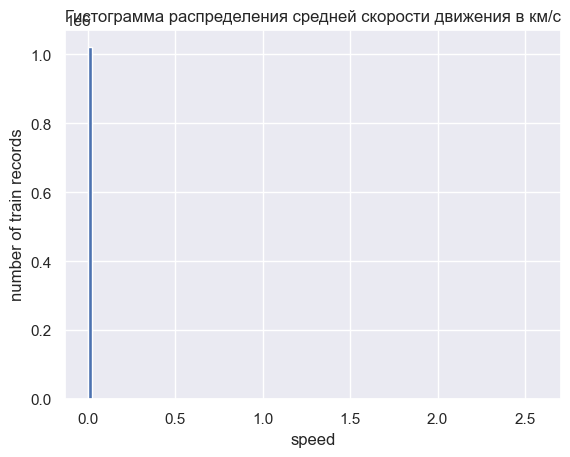

In [47]:
plt.hist(train['speed'].values, bins=100)
plt.xlabel('speed')
plt.ylabel('number of train records')
plt.title('Гистограмма распределения средней скорости движения в км/c')
plt.show

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<function matplotlib.pyplot.show(close=None, block=None)>

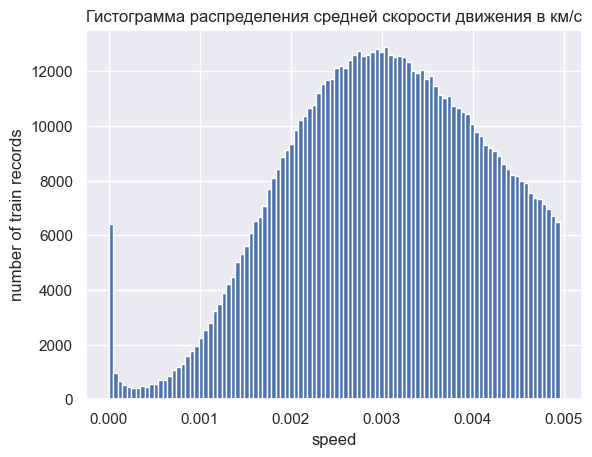

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Q_3 = train['speed'].quantile(0.75)
x = train[train['speed'] < Q_3]['speed'].values
plt.hist(x, bins=100)
plt.xlabel('speed')
plt.ylabel('number of train records')
plt.title('Гистограмма распределения средней скорости движения в км/c')
plt.show

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<function matplotlib.pyplot.show(close=None, block=None)>

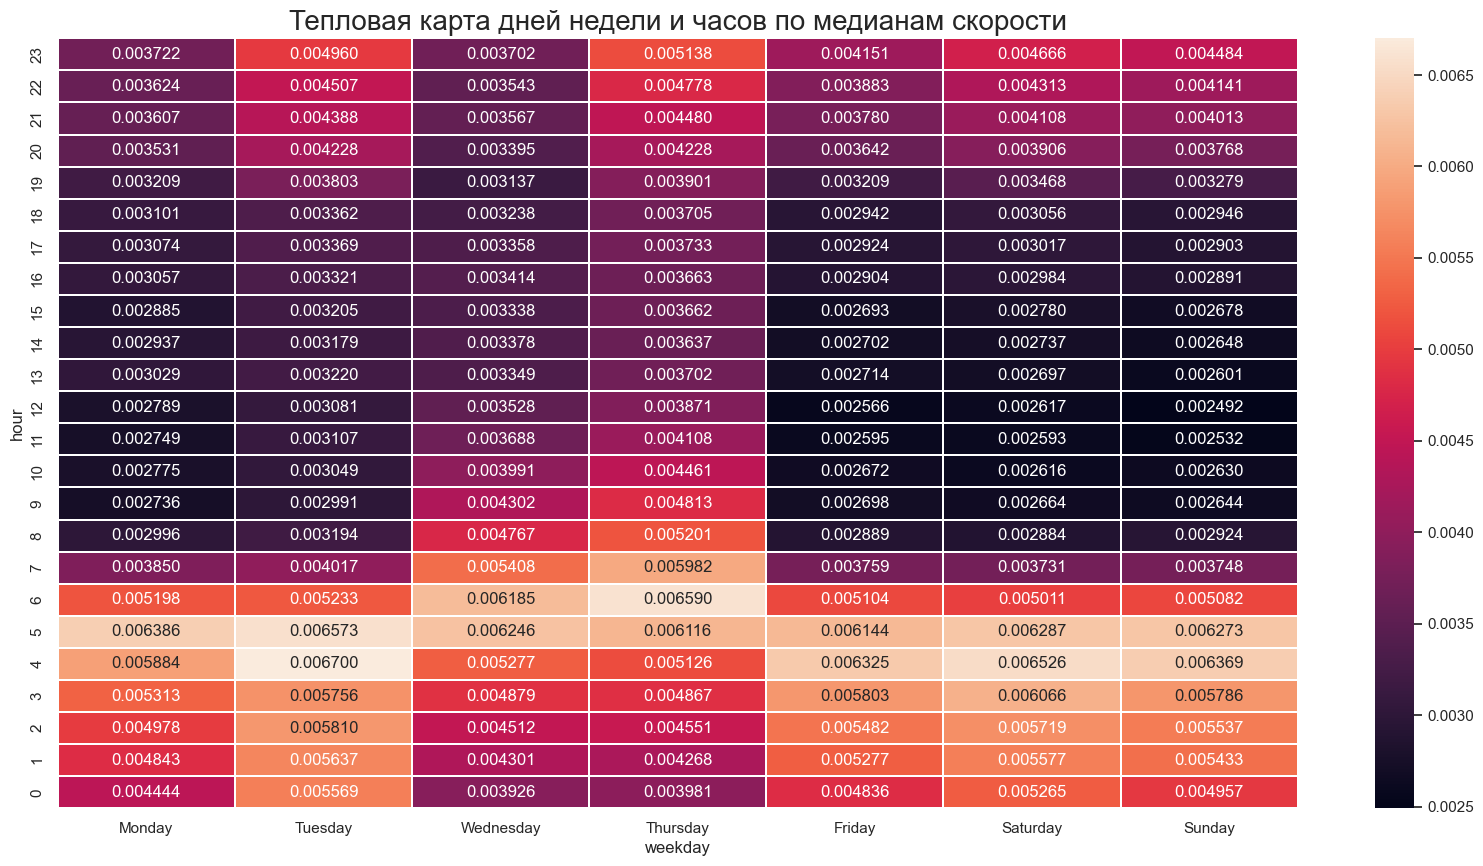

In [49]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
S = pd.DataFrame(train.groupby(['hour', 'weekday_1']).agg({'speed': ['median']}))
S.reset_index(inplace= True)
S.columns = ['hour', 'weekday', 'median']
fig, ax = plt.subplots(figsize=(20, 10))
S = S.pivot("hour", "weekday", "median")
Cols = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.title('Тепловая карта дней недели и часов по медианам скорости', fontsize = 20)
ax = sns.heatmap(S, annot=True, fmt=".6f", linewidths= .3)
ax.invert_yaxis()
ax.set_xticklabels(Cols)
plt.show

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [50]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.drop('speed', axis = 1, inplace = True)

Мы должны удалить скорость, так как она линейно зависит от расстояния и времени. Когда мы строим регрессию, предполагаем, что все признаки линейно независимы.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Скорость максимальна ранним утром в период с 4 до 5 утра по понедельникам, вторникам, пятницам, субботам и воскресеньям. Самая низкая скорость характерная для периода с 8 утра до 24 для всех дней, особенно для понедельника, вторника, пятницы, субботы, воскресенья.

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#в это время загруженность на дорогах низкая
mask1 = ((train['hour'] >=3) & (train['hour']<= 5) & ((train['weekday_1'] == 'Tuesday') | (train['weekday_1'] == 'Friday')\
                                       | (train['weekday_1'] == 'Saturday') | (train['weekday_1'] == 'Sunday')\
                                       | (train['weekday_1'] == 'Monday')))
mask2 = ((train['hour'] >= 5) & (train['hour'] <= 7) & ((train['weekday_1'] == 'Wednesday')\
                                                        | (train['weekday_1'] == 'Thursday')))

#в это время загруженность большая
mask4 = ((train['hour'] >= 8) & (train['hour'] <= 21) & ((train['weekday_1'] == 'Tuesday') | (train['weekday_1'] == 'Friday')\
                                       | (train['weekday_1'] == 'Saturday') | (train['weekday_1'] == 'Sunday')\
                                       | (train['weekday_1'] == 'Monday')))
mask3 = ((train['hour'] >= 13) & (train['hour'] <= 19) & ((train['weekday_1'] == 'Wednesday')))
train['low_traffic'] = np.where((mask1 | mask2), 1, 0) #свободные дороги
train['high_traffic'] = np.where((mask3 | mask4), 1, 0) #пробки

In [52]:
#аналогично для test
mask1 = ((test['hour'] >=3) & (test['hour']<= 5) & ((test['weekday_1'] == 'Tuesday') | (test['weekday_1'] == 'Friday')\
                                       | (test['weekday_1'] == 'Saturday') | (test['weekday_1'] == 'Sunday')\
                                       | (test['weekday_1'] == 'Monday')))
mask2 = ((test['hour'] >= 5) & (test['hour'] <= 7) & ((test['weekday_1'] == 'Wednesday')\
                                                        | (test['weekday_1'] == 'Thursday')))

#в это время загруженность большая
mask4 = ((test['hour'] >= 8) & (test['hour'] <= 21) & ((test['weekday_1'] == 'Tuesday') | (test['weekday_1'] == 'Friday')\
                                       | (test['weekday_1'] == 'Saturday') | (test['weekday_1'] == 'Sunday')\
                                       | (test['weekday_1'] == 'Monday')))
mask3 = ((test['hour'] >= 13) & (test['hour'] <= 19) & ((test['weekday_1'] == 'Wednesday')))
test['low_traffic'] = np.where((mask1 | mask2), 1, 0) #свободные дороги
test['high_traffic'] = np.where((mask3 | mask4), 1, 0) #пробки

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Эти признаки могут быть полезны, так как рассматриваемые объекты находятся на достаточно большом расстоянии от центра, туда, вероятно, едет большое количество людей, поэтому с их помощью модель сможет понимать, что время в пути будет больше.

В качестве пунктов будем рассматривать: Аэропорт Джона Кеннеди и Аэропорт Ла-Гуардия.
Координаты аэропорта Джона Кеннеди - 40.639751; -73.778926.
Координаты аэропорта Ла-Гуардия - 40.77722; -73.8725.

In [53]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mask1 = ((train['pickup_longitude'] >= -73.8) & (train['pickup_longitude'] <= -73.6) & (train['pickup_latitude'] >= 40.63)\
        & (train['pickup_latitude'] <= 40.65))
mask2 = ((train['dropoff_longitude'] >= -73.8) & (train['dropoff_longitude'] <= -73.6) & (train['dropoff_latitude'] >= 40.63)\
        & (train['dropoff_latitude'] <= 40.65))
train['pickup_air_Kenndy'] = np.where(mask1, 1, 0)
train['dropoff_air_Kennedy'] = np.where(mask2, 1, 0)
mask3 = ((train['pickup_longitude'] >= -73.89) & (train['pickup_longitude'] <= -73.86) & (train['pickup_latitude'] >= 40.76)\
        & (train['pickup_latitude'] <= 40.79))
mask4 = ((train['dropoff_longitude'] >= -73.89) & (train['dropoff_longitude'] <= -73.86) & (train['dropoff_latitude'] >= 40.76)\
        & (train['dropoff_latitude'] <= 40.79))
train['pickup_air_La'] = np.where(mask3, 1, 0)
train['dropoff_air_La'] = np.where(mask4, 1, 0)

In [54]:
mask1 = ((test['pickup_longitude'] >= -73.8) & (test['pickup_longitude'] <= -73.6) & (test['pickup_latitude'] >= 40.63)\
        & (test['pickup_latitude'] <= 40.65))
mask2 = ((test['dropoff_longitude'] >= -73.8) & (test['dropoff_longitude'] <= -73.6) & (test['dropoff_latitude'] >= 40.63)\
        & (test['dropoff_latitude'] <= 40.65))
test['pickup_air_Kenndy'] = np.where(mask1, 1, 0)
test['dropoff_air_Kennedy'] = np.where(mask2, 1, 0)
mask3 = ((test['pickup_longitude'] >= -73.89) & (test['pickup_longitude'] <= -73.86) & (test['pickup_latitude'] >= 40.76)\
        & (test['pickup_latitude'] <= 40.79))
mask4 = ((test['dropoff_longitude'] >= -73.89) & (test['dropoff_longitude'] <= -73.86) & (test['dropoff_latitude'] >= 40.76)\
        & (test['dropoff_latitude'] <= 40.79))
test['pickup_air_La'] = np.where(mask3, 1, 0)
test['dropoff_air_La'] = np.where(mask4, 1, 0)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [55]:
train['pickup_air_Kenndy'] = train['pickup_air_Kenndy'].astype(str)
train['dropoff_air_Kennedy'] = train['dropoff_air_Kennedy'].astype(str)
train['pickup_air_La'] = train['pickup_air_La'].astype(str)
train['dropoff_air_La'] = train['dropoff_air_La'].astype(str)
test['pickup_air_Kenndy'] = test['pickup_air_Kenndy'].astype(str)
test['dropoff_air_Kennedy'] = test['dropoff_air_Kennedy'].astype(str)
test['pickup_air_La'] = test['pickup_air_La'].astype(str)
test['dropoff_air_La'] = test['dropoff_air_La'].astype(str)

<function matplotlib.pyplot.show(close=None, block=None)>

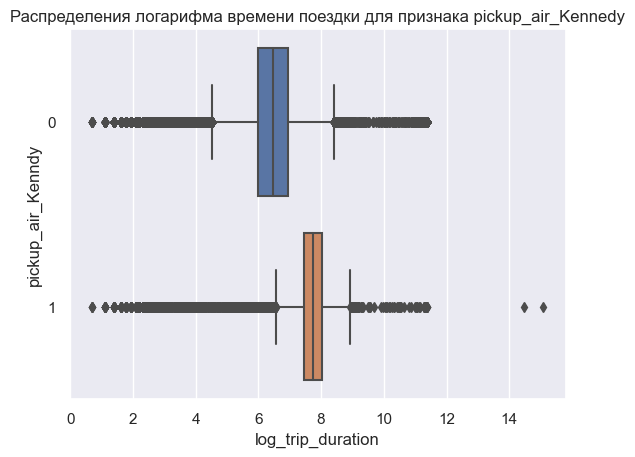

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
sns.boxplot(data=train, x="log_trip_duration", y="pickup_air_Kenndy")
plt.title('Распределения логарифма времени поездки для признака pickup_air_Kennedy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

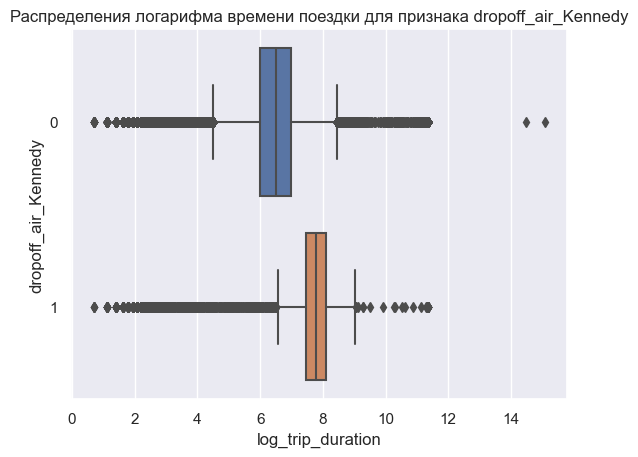

In [57]:
sns.boxplot(data=train, x="log_trip_duration", y="dropoff_air_Kennedy")
plt.title('Распределения логарифма времени поездки для признака dropoff_air_Kennedy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

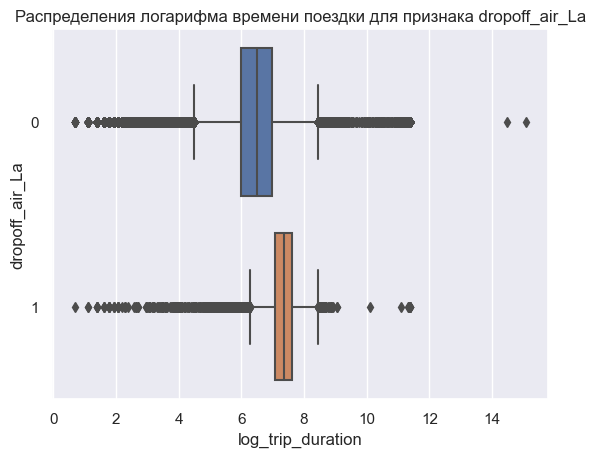

In [58]:
sns.boxplot(data=train, x="log_trip_duration", y="dropoff_air_La")
plt.title('Распределения логарифма времени поездки для признака dropoff_air_La')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

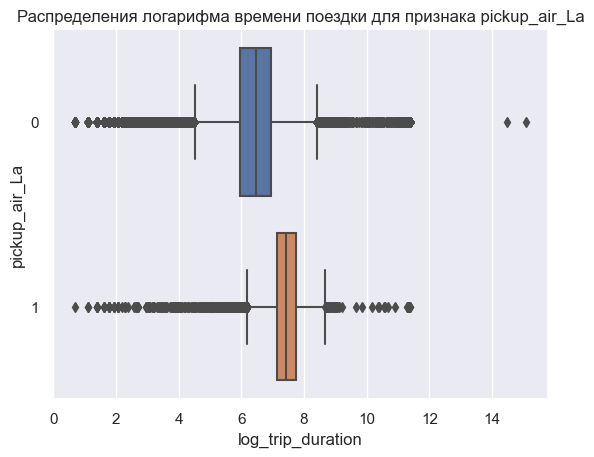

In [59]:
sns.boxplot(data=train, x="log_trip_duration", y="pickup_air_La")
plt.title('Распределения логарифма времени поездки для признака pickup_air_La')
plt.show

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Значения логарифма, в пределах которых находятся ящики с усами для каждой из категорий частично пересекаются, но не совпадают полностью. Значит, эти признаки должны быть полезны для нашей модели.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

Изображенная на картинке область лежит на долготе от -74.05 до -73.925 и на широте от 40.7 до 40.825 (было предположено, исходя из графика с семинара). 
Возьмем координаты из обучающей выборки, которые входят в эти интервалы, найдем мин и макс. Будем разбивать на 9 квадратов.

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, h, v): #h- количество блоков по долготе, v - количество блоков по широте
        # your code here
        self.h = h 
        self.v = v
        pass
    
    #def show_map(self):
        # you may want to visualize cells
        #pass
    
    def fit(self, X, y=None):
        # your code here
        L = np.array(X.iloc[:, 0]) #берем долготу 
        L_min = L[(L <= -73.925) & (L >= -74.05)].min()
        L_max = L[(L <= -73.925) & (L >= -74.05)].max()
        l = (L_max-L_min)/self.h
        S = np.array(X.iloc[:, 1])
        S_min = S[(S <= 40.825) & (S >= 40.7)].min()
        S_max = S[(S <= 40.825) & (S >= 40.7)].max()
        s = (S_max-S_min)/self.v #берем широту
        
        self.h_cnt = []   #.extend([L_min, L_min+l, L_min+2*l, L_min+3*l])
        self.v_cnt = [] #.extend([S_min, S_min+s, S_min+2*s, S_min+3*s])
        
        for i in range(self.h+1):
            self.h_cnt.append(L_min+i*l)
        for j in range(self.v+1):
            self.v_cnt.append(S_min+j*s)
            
        return self

    def transform(self, X, y=None):
        # your code here
        X['new_col'] = -1
        mask1 = ((X.iloc[:, 0] <= self.h_cnt[1]) & (X.iloc[:, 0] >= self.h_cnt[0])\
                &(X.iloc[:, 1] <= self.v_cnt[3]) & (X.iloc[:, 1] >= self.v_cnt[2]))
        mask4 = ((X.iloc[:, 0] <= self.h_cnt[1]) & (X.iloc[:, 0] >= self.h_cnt[0])\
                &(X.iloc[:, 1] <= self.v_cnt[2]) & (X.iloc[:, 1] >= self.v_cnt[1]))
        mask7 = ((X.iloc[:, 0] <= self.h_cnt[1]) & (X.iloc[:, 0] >= self.h_cnt[0])\
                &(X.iloc[:, 1] <= self.v_cnt[1]) & (X.iloc[:, 1] >= self.v_cnt[0]))
        mask2 = ((X.iloc[:, 0] <= self.h_cnt[2]) & (X.iloc[:, 0] >= self.h_cnt[1])\
                &(X.iloc[:, 1] <= self.v_cnt[3]) & (X.iloc[:, 1] >= self.v_cnt[2]))
        mask5 = ((X.iloc[:, 0] <= self.h_cnt[2]) & (X.iloc[:, 0] >= self.h_cnt[1])\
                &(X.iloc[:, 1] <= self.v_cnt[2]) & (X.iloc[:, 1] >= self.v_cnt[1]))
        mask8 = ((X.iloc[:, 0] <= self.h_cnt[2]) & (X.iloc[:, 0] >= self.h_cnt[1])\
                &(X.iloc[:, 1] <= self.v_cnt[1]) & (X.iloc[:, 1] >= self.v_cnt[0]))
        mask3 = ((X.iloc[:, 0] <= self.h_cnt[3]) & (X.iloc[:, 0] >= self.h_cnt[2])\
                &(X.iloc[:, 1] <= self.v_cnt[3]) & (X.iloc[:, 1] >= self.v_cnt[2]))
        mask6 = ((X.iloc[:, 0] <= self.h_cnt[3]) & (X.iloc[:, 0] >= self.h_cnt[2])\
                &(X.iloc[:, 1] <= self.v_cnt[2]) & (X.iloc[:, 1] >= self.v_cnt[1]))
        mask9 = ((X.iloc[:, 0] <= self.h_cnt[3]) & (X.iloc[:, 0] >= self.h_cnt[2])\
                &(X.iloc[:, 1] <= self.v_cnt[1]) & (X.iloc[:, 1] >= self.v_cnt[0]))
        X.new_col = X.new_col.mask(mask1, str(1))
        X.new_col = X.new_col.mask(mask2, str(2))
        X.new_col = X.new_col.mask(mask3, str(3))
        X.new_col = X.new_col.mask(mask4, str(4))
        X.new_col = X.new_col.mask(mask5, str(5))
        X.new_col = X.new_col.mask(mask6, str(6))
        X.new_col = X.new_col.mask(mask7, str(7))
        X.new_col = X.new_col.mask(mask8, str(8))
        X.new_col = X.new_col.mask(mask9, str(9))
        return X

In [61]:
# X = train[['pickup_longitude', 'pickup_latitude']]
# S = np.array(X.iloc[:, 1])
# mask1 = (X.iloc[:, 0] <= -74)
# mask2 = (X.iloc[:, 0] >= -73)
# X['col'] = -1
# X['col'] = np.where(mask1, )

In [62]:
map_grid_transformer = MapGridTransformer(h = 3, v = 3)
train_pick_up = train[['pickup_longitude', 'pickup_latitude']]
map_grid_transformer.fit(X = train_pick_up)

MapGridTransformer(h=3, v=3)

In [63]:
import warnings
warnings.filterwarnings("ignore")
test_pick_up = test[['pickup_longitude', 'pickup_latitude']]
Res_pickup_train = map_grid_transformer.transform(train_pick_up)
Res_pickup_test = map_grid_transformer.transform(test_pick_up)

In [64]:
map_grid_transformer = MapGridTransformer(3, 3)
train_drop_off = train[['dropoff_longitude', 'dropoff_latitude']]
map_grid_transformer.fit(X = train_drop_off)

MapGridTransformer(h=3, v=3)

In [65]:
import warnings
warnings.filterwarnings("ignore")
test_drop_off = test[['dropoff_longitude', 'dropoff_latitude']]
Res_dropoff_train = map_grid_transformer.transform(train_drop_off)
Res_dropoff_test = map_grid_transformer.transform(test_drop_off)

In [66]:
train['pickup_zone'] = Res_pickup_train['new_col']
train['dropoff_zone'] = Res_dropoff_train['new_col']
test['pickup_zone'] = Res_pickup_test['new_col']
test['dropoff_zone'] = Res_dropoff_test['new_col']

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [67]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = train.set_index(np.arange(len(train)))
test = test.set_index(np.arange(len(test)))
X_train[['low_traffic', 'high_traffic']] = train[['low_traffic', 'high_traffic']]
X_test[['low_traffic', 'high_traffic']] = test[['low_traffic', 'high_traffic']]
X_train[['pickup_air_Kenndy', 'dropoff_air_Kennedy', 'pickup_air_La', 'dropoff_air_La']]\
        = train[['pickup_air_Kenndy', 'dropoff_air_Kennedy', 'pickup_air_La', 'dropoff_air_La']]
X_test[['pickup_air_Kenndy', 'dropoff_air_Kennedy', 'pickup_air_La', 'dropoff_air_La']]\
        = test[['pickup_air_Kenndy', 'dropoff_air_Kennedy', 'pickup_air_La', 'dropoff_air_La']]

In [68]:
X_train['log_haversine'] = train['log_haversine']
X_test['log_haversine'] = test['log_haversine']
normalizer = preprocessing.StandardScaler()
normalizer.fit(pd.DataFrame(X_train['log_haversine']))
X_train_norm = normalizer.transform(pd.DataFrame(X_train['log_haversine']))
X_test_norm = normalizer.transform(pd.DataFrame(X_test['log_haversine']))
X_train['log_haversine'] = X_train_norm
X_test['log_haversine'] = X_test_norm

In [69]:
ohe_encoder = ce.OneHotEncoder(return_df=True, use_cat_names=True)
ohe_encoder.fit(train[['pickup_zone', 'dropoff_zone']])
train_cat_ohe_new = ohe_encoder.transform(train[['pickup_zone', 'dropoff_zone']])
test_cat_ohe_new = ohe_encoder.transform(test[['pickup_zone', 'dropoff_zone']])

In [70]:
train_cat_ohe_new = train_cat_ohe_new.drop(['pickup_zone_1', 'dropoff_zone_1'], axis = 1)
test_cat_ohe_new = test_cat_ohe_new.drop(['pickup_zone_1', 'dropoff_zone_1'], axis = 1)

In [71]:
X_train = pd.concat([X_train, train_cat_ohe_new], axis = 1)
X_test = pd.concat([X_test, test_cat_ohe_new], axis = 1)

In [72]:
from sklearn.linear_model import Ridge
ridge_1 = Ridge().fit(X_train, train['log_trip_duration'])

In [73]:
print(f"Train loss: {mean_squared_error(train['log_trip_duration'], ridge_1.predict(X_train), squared = False)}")
print(f"Test loss: {mean_squared_error(test['log_trip_duration'], ridge_1.predict(X_test), squared = False)}")

Train loss: 0.4890150991024929
Test loss: 0.48728821711471587


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
len(train['vendor_id'].unique())

2

In [75]:
len(train['passenger_count'].unique())

8

In [76]:
len(train['store_and_fwd_flag'].unique())

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<function matplotlib.pyplot.show(close=None, block=None)>

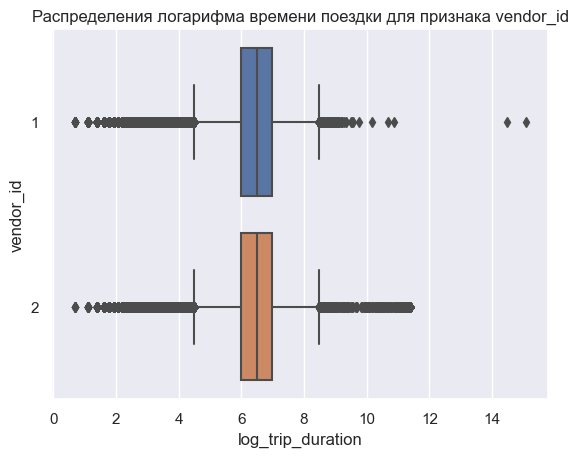

In [77]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['vendor_id'] = train['vendor_id'].astype(str)
test['vendor_id'] = test['vendor_id'].astype(str)
sns.boxplot(data=train, x="log_trip_duration", y="vendor_id")
plt.title('Распределения логарифма времени поездки для признака vendor_id')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

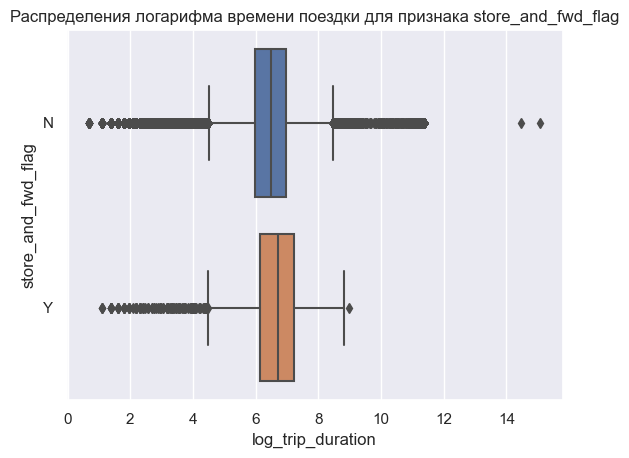

In [78]:
sns.boxplot(data=train, x="log_trip_duration", y="store_and_fwd_flag")
plt.title('Распределения логарифма времени поездки для признака store_and_fwd_flag')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

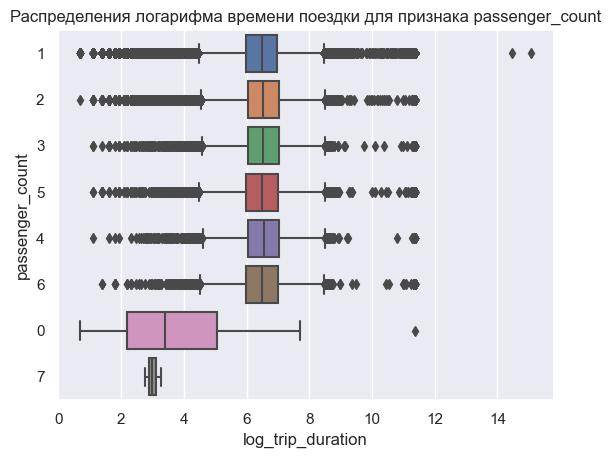

In [79]:
train['passenger_count'] = train['passenger_count'].astype(str)
test['passenger_count'] = test['passenger_count'].astype(str)
sns.boxplot(data=train, x="log_trip_duration", y="passenger_count")
plt.title('Распределения логарифма времени поездки для признака passenger_count')
plt.show

In [80]:
train['passenger_count'] = train['passenger_count'].astype(int)
test['passenger_count'] = test['passenger_count'].astype(int)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [81]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['vendor_id'] = np.where(train['vendor_id'] == '1', 1, 0)
test['vendor_id'] = np.where(test['vendor_id'] == '1', 1, 0)
train['store_and_fwd_flag'] = np.where(train['store_and_fwd_flag'] == 'N', 1, 0)
test['store_and_fwd_flag'] = np.where(test['store_and_fwd_flag'] == 'N', 1, 0)

In [82]:
X_train['vendor_id'] = train['vendor_id']
X_test['vendor_id'] = test['vendor_id']
X_train['store_and_fwd_flag'] = train['store_and_fwd_flag']
X_test['store_and_fwd_flag'] = test['store_and_fwd_flag']

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Признаки получились не очень хорошими, так как для 'vendor_id' и 'store_and_fwd_flag' интервалы логарифмов для каждой из категорий практически полностью совпадают, для 'passenger_count' отличаются только для значений 0 и 7. То есть деление на категории согласно этим признакам не поможет определить длительность путешествия, для всех категорий она примерно в одном диапазоне.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [83]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['passenger_count'] = train['passenger_count']
X_test['passenger_count'] = test['passenger_count']
normalizer = preprocessing.StandardScaler()
normalizer.fit(pd.DataFrame(X_train['passenger_count']))
X_train_norm = normalizer.transform(pd.DataFrame(X_train['passenger_count']))
X_test_norm = normalizer.transform(pd.DataFrame(X_test['passenger_count']))
X_train['passenger_count'] = X_train_norm
X_test['passenger_count'] = X_test_norm

In [84]:
ridge_2 = Ridge().fit(X_train, train['log_trip_duration'])

In [85]:
print(f"Train loss: {mean_squared_error(train['log_trip_duration'], ridge_2.predict(X_train), squared = False)}")
print(f"Test loss: {mean_squared_error(test['log_trip_duration'], ridge_2.predict(X_test), squared = False)}")

Train loss: 0.4887932274819706
Test loss: 0.48713782078484785


Качество практически не изменилось, удалим эти признаки.

In [86]:
X_train = X_train.drop(['passenger_count', 'vendor_id', 'store_and_fwd_flag'], axis = 1)
X_test = X_test.drop(['passenger_count', 'vendor_id', 'store_and_fwd_flag'], axis = 1)

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [87]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['log_trip_duration'] = train['log_trip_duration']
X_test['log_trip_duration'] = test['log_trip_duration']

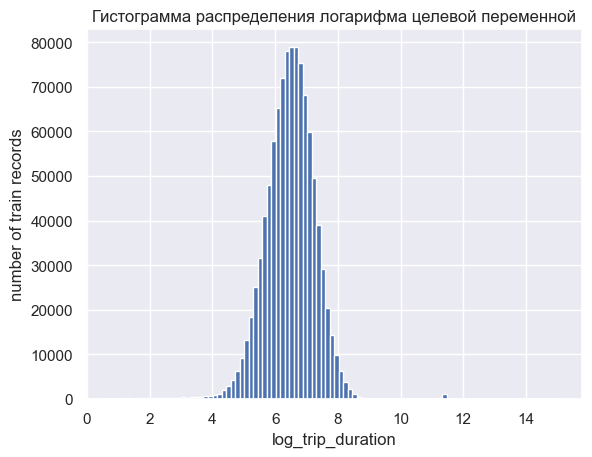

In [88]:
plt.hist(X_train['log_trip_duration'].values, bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('number of train records')
plt.title('Гистограмма распределения логарифма целевой переменной')
plt.show()

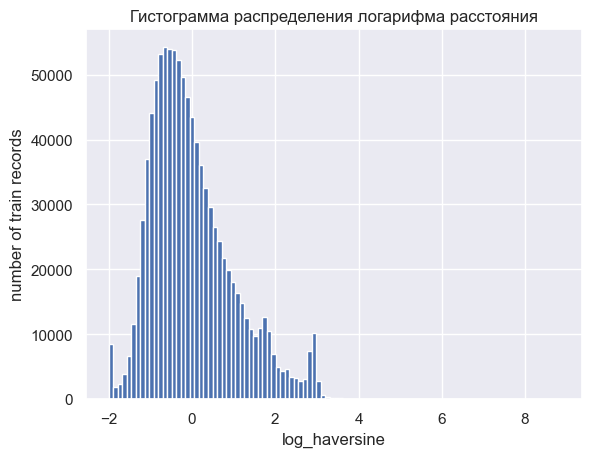

In [89]:
plt.hist(X_train['log_haversine'].values, bins=100)
plt.xlabel('log_haversine')
plt.ylabel('number of train records')
plt.title('Гистограмма распределения логарифма расстояния')
plt.show()

In [90]:
#воспользуемся моделью ridge_1, так как мы решили удалить признаки пунктом выше
#найдем квадраты остатков для каждого наблюдения
y_pred = ridge_1.predict(X_train.iloc[:, :-1])
y_true = X_train.iloc[:, -1]
X_train['residuals'] = (y_true-y_pred)**2

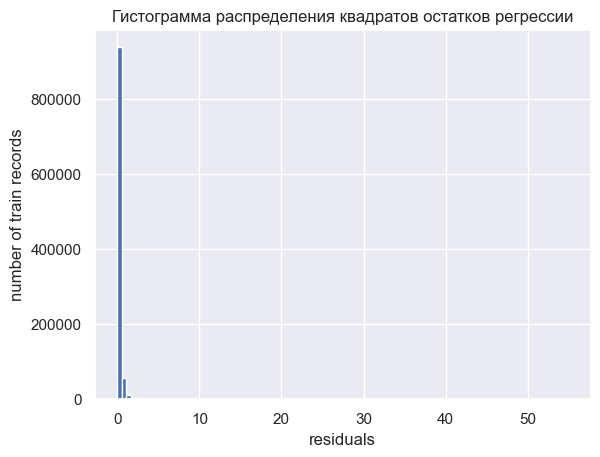

In [91]:
plt.hist(X_train['residuals'].values, bins=100)
plt.xlabel('residuals')
plt.ylabel('number of train records')
plt.title('Гистограмма распределения квадратов остатков регрессии')
plt.show()

In [92]:
#для каждой из переменных найдем значение IQR
q75_td, q25_td = np.percentile(X_train['log_trip_duration'], [75 ,25])
iqr_td = q75_td - q25_td
q75_h, q25_h = np.percentile(X_train['log_haversine'], [75 ,25])
iqr_h = q75_h - q25_h
q75_r, q25_r = np.percentile(X_train['residuals'], [75 ,25])
iqr_r = q75_r - q25_r

In [93]:
X_train.shape

(1021050, 222)

In [94]:
#удалим наблюдения, для которых логарифм времени поездки меньше Q1-1.5*IQR
Q_1 = X_train['log_trip_duration'].quantile(0.25)
X_train_clean = X_train[(X_train['log_trip_duration'] >= Q_1-1.5*iqr_td)]

In [95]:
#удалим наблюдения, для которых логарифм расстояния больше Q3+1.5*IQR
Q_3 = X_train['log_haversine'].quantile(0.75)
X_train_clean = X_train_clean[(X_train_clean['log_haversine'] <= Q_3+1.5*iqr_h)]

In [96]:
#удалим наблюдения, для которых квадрат остатков больше Q3+1.5*IQR
Q_3 = X_train['residuals'].quantile(0.75)
X_train_clean = X_train_clean[(X_train_clean['residuals'] <= Q_3+1.5*iqr_r)]

In [97]:
X_train_clean.shape

(896433, 222)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [98]:
#поработаем с датасетом, где категориальные признаки остались в первоначальном виде, сначала также очистим его от выбросов
train['residuals'] = X_train['residuals']
train['log_haversine_norm'] = X_train['log_haversine'] #так как в train ненормированный логарифм
Q_1 = X_train['log_trip_duration'].quantile(0.25)
train_clean = train[(train['log_trip_duration'] >= Q_1-1.5*iqr_td)]
Q_3 = X_train['log_haversine'].quantile(0.75)
train_clean = train_clean[(train_clean['log_haversine_norm'] <= Q_3+1.5*iqr_h)]
Q_3 = X_train['residuals'].quantile(0.75)
train_clean = train_clean[(train_clean['residuals'] <= Q_3+1.5*iqr_r)]

In [99]:
train_clean.shape

(896433, 29)

In [100]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#посмотрим на категориальные признаки, которые мы закодировали при помощи OHE
train_clean.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'pickup_date',
       'log_trip_duration', 'hour', 'month', 'weekday_1', 'day_of_year',
       'abnormal_1', 'abnormal_2', 'haversine', 'log_haversine', 'low_traffic',
       'high_traffic', 'pickup_air_Kenndy', 'dropoff_air_Kennedy',
       'pickup_air_La', 'dropoff_air_La', 'pickup_zone', 'dropoff_zone',
       'residuals', 'log_haversine_norm'],
      dtype='object')

Рассмотрим категориальные признаки: 'month', 'weekday_1', 'day_of_year', 'pickup_zone', 'dropoff_zone'. Остальные категориальные признаки имеют две категории: 0 и 1.

In [101]:
train_clean['month'].value_counts() #в этом случае можно оставить как есть 

3    158907
4    153953
5    151381
2    147987
6    142232
1    141973
Name: month, dtype: int64

In [102]:
train_clean['weekday_1'].value_counts() #здесь тоже нет очень много редких категорий

Friday       137868
Saturday     136844
Thursday     132781
Wednesday    128006
Tuesday      124764
Sunday       120403
Monday       115767
Name: weekday_1, dtype: int64

Text(0.5, 1.0, 'График отсортированных частот  признака day_of_year')

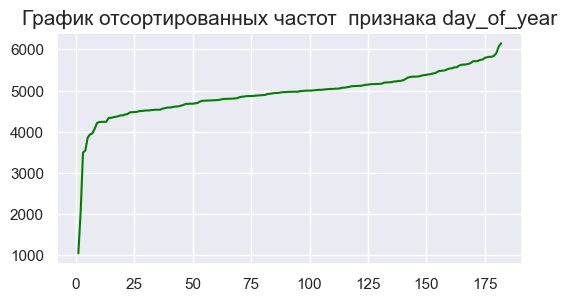

In [103]:
#для признака day_of_year посмотрим, какие частоты имеют значения
s = list(train_clean['day_of_year'].value_counts().sort_values())
d = (list(range(1, len(s)+1)))
plt.figure(figsize=(6,3))
plt.plot(d, s, color = 'green')
plt.title('График отсортированных частот  признака day_of_year', fontsize = 15)

In [104]:
#посмотрим, для каких категорий частота меньше 4500, будем считать их редкими
D = pd.DataFrame(train_clean['day_of_year'].value_counts())
indexes = list(D[D['day_of_year'] < 4500].index)

In [105]:
#объединим эти дни в одну категорию
train_clean['day_of_year'][train_clean['day_of_year'].isin(indexes)] = 'other'

In [106]:
X_train_clean.drop('residuals', axis = 1, inplace = True)
#удалим категории day_of_year
X_train_clean = X_train_clean[X_train_clean.columns.drop(list(X_train_clean.filter(regex='day_of_year')))] 

In [107]:
#снова сделаем OHE day_of_year
ohe_encoder.fit(train_clean[['day_of_year']])
train_cat_ohe_new = ohe_encoder.transform(train_clean[['day_of_year']])
train_cat_ohe_new = train_cat_ohe_new.drop(['day_of_year_33'], axis = 1)
X_train_clean = pd.concat([X_train_clean, train_cat_ohe_new], axis = 1)

In [108]:
#сделаем то же самое для тестовой выборки
test['day_of_year'][test['day_of_year'].isin(indexes)] = 'other'
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='day_of_year')))]
test_cat_ohe_new = ohe_encoder.transform(test[['day_of_year']])
test_cat_ohe_new = test_cat_ohe_new.drop(['day_of_year_33'], axis = 1)
X_test = pd.concat([X_test, test_cat_ohe_new], axis = 1)

In [109]:
train_clean['pickup_zone'].value_counts() #здесь можно объединить 9 и 4

5     404142
8     213354
6     127588
-1     46044
2      35243
3      33088
7      31441
9       5195
4        338
Name: pickup_zone, dtype: int64

In [110]:
X_train_clean['pickup_zone_9']

0          0
1          0
3          0
4          0
5          0
          ..
1021045    0
1021046    0
1021047    0
1021048    0
1021049    0
Name: pickup_zone_9, Length: 896433, dtype: int64

In [111]:
X_train_clean['pickup_zone_other'] = X_train_clean['pickup_zone_9'] + X_train_clean['pickup_zone_4']
X_train_clean.drop(['pickup_zone_9', 'pickup_zone_4'], axis= 1 , inplace= True)

In [112]:
X_test['pickup_zone_other'] = X_test['pickup_zone_9'] + X_test['pickup_zone_4']
X_test.drop(['pickup_zone_9', 'pickup_zone_4'], axis= 1 , inplace= True)

In [113]:
train_clean['dropoff_zone'].value_counts() #здесь можно объединить 1, 9 и 4 (1- уже выкидывали, когда делали OHE)

5     369914
8     189362
6     125392
-1     75807
3      52795
2      35563
7      33962
9      12849
4        771
1         18
Name: dropoff_zone, dtype: int64

In [114]:
X_train_clean['dropoff_zone_other'] = X_train_clean['dropoff_zone_9'] + X_train_clean['dropoff_zone_4']
X_train_clean.drop(['dropoff_zone_9', 'dropoff_zone_4'], axis= 1 , inplace= True)

In [115]:
X_test['dropoff_zone_other'] = X_test['dropoff_zone_9'] + X_test['dropoff_zone_4']
X_test.drop(['dropoff_zone_9', 'dropoff_zone_4'], axis= 1 , inplace= True)

In [116]:
y_train = X_train_clean['log_trip_duration']
y_test = X_test['log_trip_duration']
X_train_clean.drop('log_trip_duration', axis= 1 , inplace= True)
X_test.drop('log_trip_duration', axis= 1 , inplace= True)

In [117]:
ridge_3 = Ridge().fit(X_train_clean, y_train)

In [118]:
print(f"Train loss: {mean_squared_error(y_train, ridge_3.predict(X_train_clean), squared = False)}")
print(f"Test loss: {mean_squared_error(y_test, ridge_3.predict(X_test), squared = False)}")

Train loss: 0.3204095325621011
Test loss: 0.48872617554300035


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [119]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_clean.shape

(896433, 192)

Сейчас в нашем датасете 192 признака, не включая удаленные. Вместе с удаленными - 195.

In [120]:
data1 = pd.read_csv('train_hw2_mo.csv')
data1.shape

(1458644, 11)

Изначально в нашем датасете было 10 признаков (11, так как датасет с целевой переменной).

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [121]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_clean, y_train)

In [122]:
print(f"Train loss: {mean_squared_error(y_train, lasso.predict(X_train_clean), squared = False)}")
print(f"Test loss: {mean_squared_error(y_test, lasso.predict(X_test), squared = False)}")

Train loss: 0.6349049412771945
Test loss: 0.7943115376851879


Ridge регрессия лучше, так как для нее ошибка и на тестовой, и на обучающей меньше, чем для Lasso.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [123]:
X_train_clean[['pickup_zone', 'dropoff_zone']] = train_clean[['pickup_zone', 'dropoff_zone']]
X_test[['pickup_zone', 'dropoff_zone']] = test[['pickup_zone', 'dropoff_zone']]

In [124]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.random.seed(1)
X_train, X_val, y_train, y_val = train_test_split(X_train_clean, y_train, test_size = 0.2)

In [125]:
X_train_zones = X_train[['pickup_zone', 'dropoff_zone']]
X_val_zones = X_val[['pickup_zone', 'dropoff_zone']]
X_test_zones = X_test[['pickup_zone', 'dropoff_zone']]
X_train.drop(['pickup_zone', 'dropoff_zone'], axis= 1 , inplace= True)
X_val.drop(['pickup_zone', 'dropoff_zone'], axis= 1 , inplace= True)
X_test.drop(['pickup_zone', 'dropoff_zone'], axis= 1 , inplace= True)

In [126]:
lasso_1 = Lasso().fit(X_train, y_train)

In [127]:
ridge_4 = Ridge().fit(X_train, y_train)

Best alpha = 0.3793


Text(0, 0.5, 'CV score')

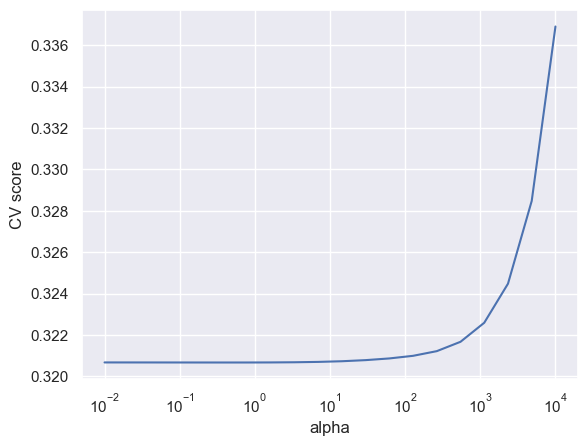

In [128]:
from sklearn.model_selection import GridSearchCV
np.random.seed(1)
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(ridge_4, [{"alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Best alpha = 0.0100


Text(0, 0.5, 'CV score')

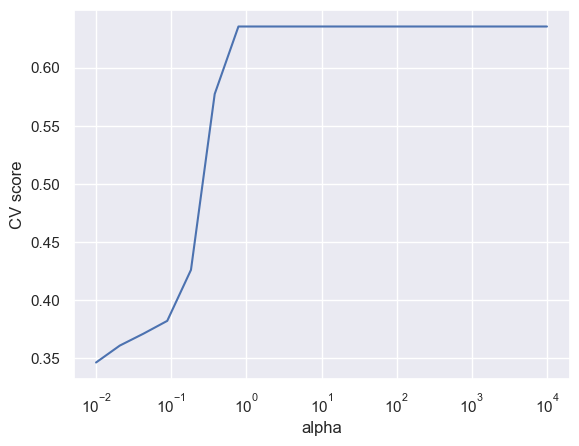

In [129]:
np.random.seed(1)
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_1, [{"alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [130]:
ridge_5 = Ridge(alpha = 0.3793).fit(X_train, y_train)
print(f"Ridge test loss: {mean_squared_error(y_test, ridge_5.predict(X_test), squared = False)}")

Ridge test loss: 0.4887072266169786


In [131]:
lasso_2 = Lasso(alpha = 0.01).fit(X_train, y_train)
print(f"Ridge test loss: {mean_squared_error(y_test, lasso_2.predict(X_test), squared = False)}")

Ridge test loss: 0.5098991789880298


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
zeros = []
for i in list(alphas):
    lasso_c = Lasso(alpha = i).fit(X_train, y_train)
    lasso_zeros = np.sum(lasso_c.coef_ == 0)
    zeros.append(lasso_zeros)

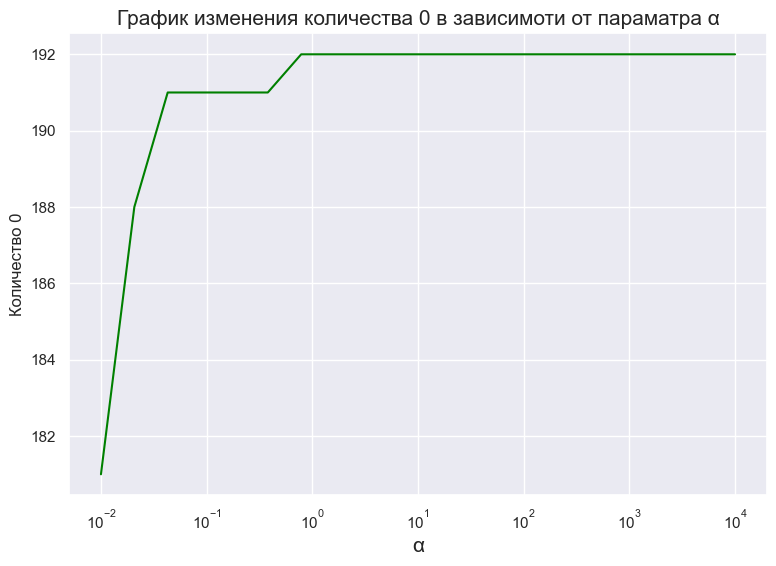

In [133]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(9,6))
plt.plot(alphas, zeros, color = 'green')
plt.xlabel(str(chr(945)), fontsize = 15)
plt.ylabel('Количество 0', fontsize = 12)
plt.title('График изменения количества 0 в зависимоти от параматра ' + str(chr(945)), fontsize = 15)
plt.xscale("log")

На графике видно, что даже когда мы берем самую маленькую альфу (из списка), сразу получаем зануление количества весов, которое превышает половину признаков.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Модель не знает, что эти признаки можно связать между собой. Она воспринимает их просто, как числа. Этот признак может быть полезен, так как, вероятно, он указывает на самые популярные маршруты, то есть высока вероятность, что новые объекты тоже будут следовать по этим маршрутам.

In [134]:
X_train['up-off'] = X_train_zones['pickup_zone'].astype(str) + ':' + X_train_zones['dropoff_zone'].astype(str)
X_test['up-off'] = X_test_zones['pickup_zone'].astype(str) + ':' + X_test_zones['dropoff_zone'].astype(str)

In [135]:
top = X_train['up-off'].value_counts().head(100).index.tolist()
len(top)

84

У нас получилось всего 84 (вероятно из-за того, что разбиение делалось на 9 зон, тогда максимальное количество комбинаций - 100, но некоторые могут отсутствовать) уникальных маршрута, поэтому возьмем топ-60.

In [136]:
top_1 = X_train['up-off'].value_counts().head(60).index.tolist()

In [137]:
X_train['popular_route'] = 0
X_train['popular_route'][X_train['up-off'].isin(top_1)] = 1

In [138]:
X_test['popular_route'] = 0
X_test['popular_route'][X_test['up-off'].isin(top_1)] = 1

In [139]:
X_test.drop('up-off', axis = 1, inplace = True)
X_train.drop('up-off', axis = 1, inplace = True)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

Построим Ridge, так как эта модель показывала лучшее качество.

In [140]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
ridge_6 = Ridge(alpha = 0.3793).fit(X_train, y_train)
print(f"train loss: {mean_squared_error(y_train, ridge_6.predict(X_train), squared = False)}")
print(f"test loss: {mean_squared_error(y_test, ridge_6.predict(X_test), squared = False)}")

train loss: 0.32040638935315063
test loss: 0.48870980986945584


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [141]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [142]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [143]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

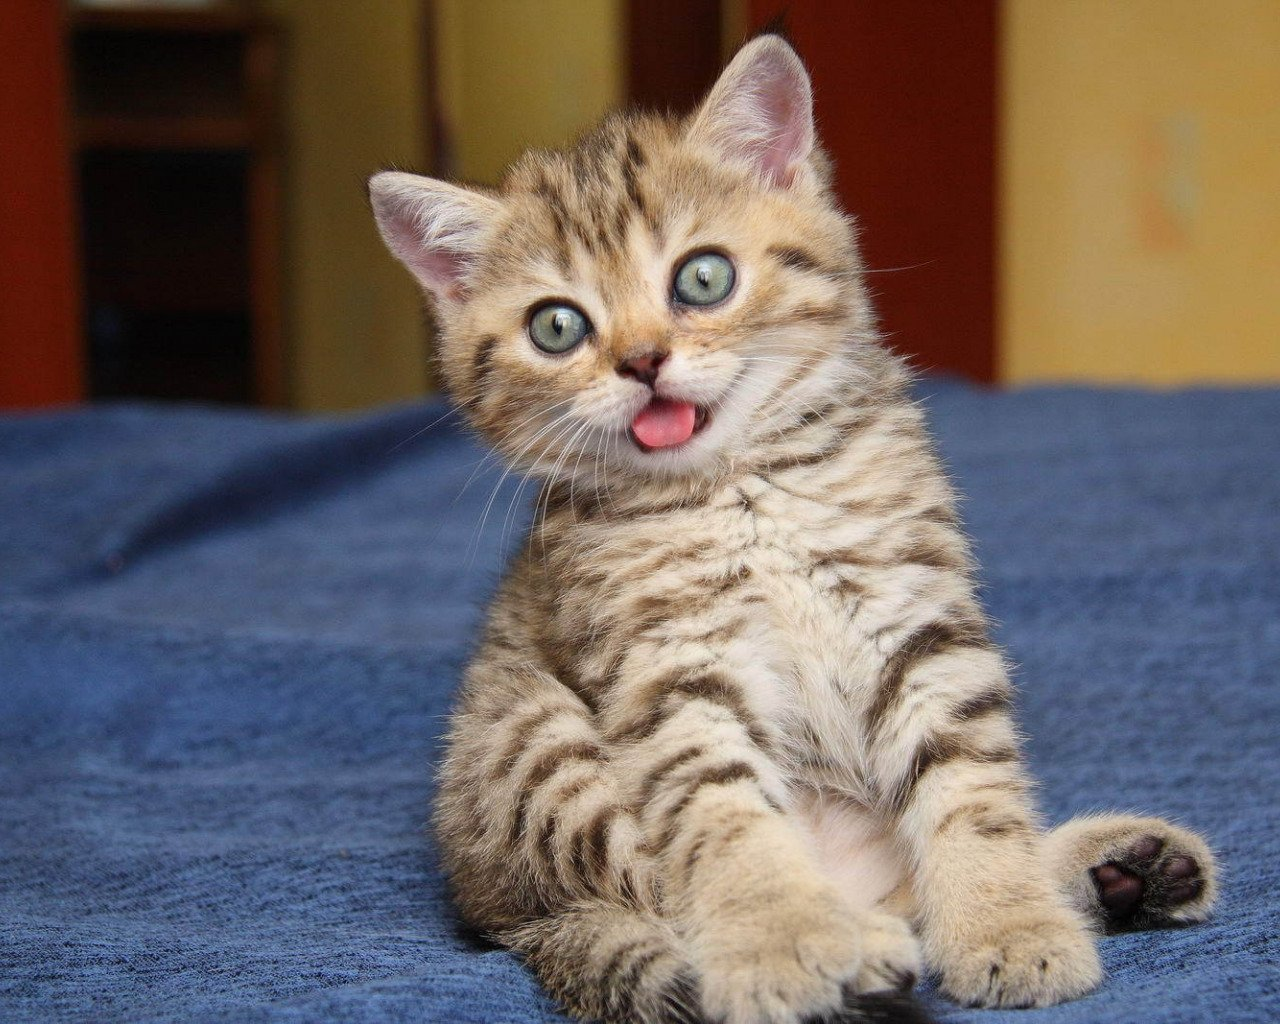